<a href="https://colab.research.google.com/github/naveen-ramavath/machine-learning/blob/main/ml_week_5_lesso_and_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lesso and ridge

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
data=pd.read_csv("diabetes.csv")

In [4]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [8]:
ridge = Ridge(alpha=1.0)   # alpha = λ, regularization strength
ridge.fit(X_train, y_train)

Ridge()

In [9]:
lasso = Lasso(alpha=0.01)   # smaller alpha = less strict
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [11]:
# Predictions
y_pred_lin = lin.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

In [12]:
# Compare coefficients
print("----- Coefficients -----")
print("Linear Regression:", lin.coef_)
print("Ridge Regression :", ridge.coef_)
print("Lasso Regression :", lasso.coef_)

----- Coefficients -----
Linear Regression: [ 0.03525038  0.18000138 -0.04412242  0.00848254 -0.03203368  0.11848984
  0.03684049  0.07592476]
Ridge Regression : [ 0.03527744  0.17967182 -0.04392537  0.00840616 -0.03182     0.11829863
  0.0368259   0.07582532]
Lasso Regression : [ 0.0291717   0.16750113 -0.02487701  0.         -0.01314114  0.1068685
  0.0280555   0.0676387 ]


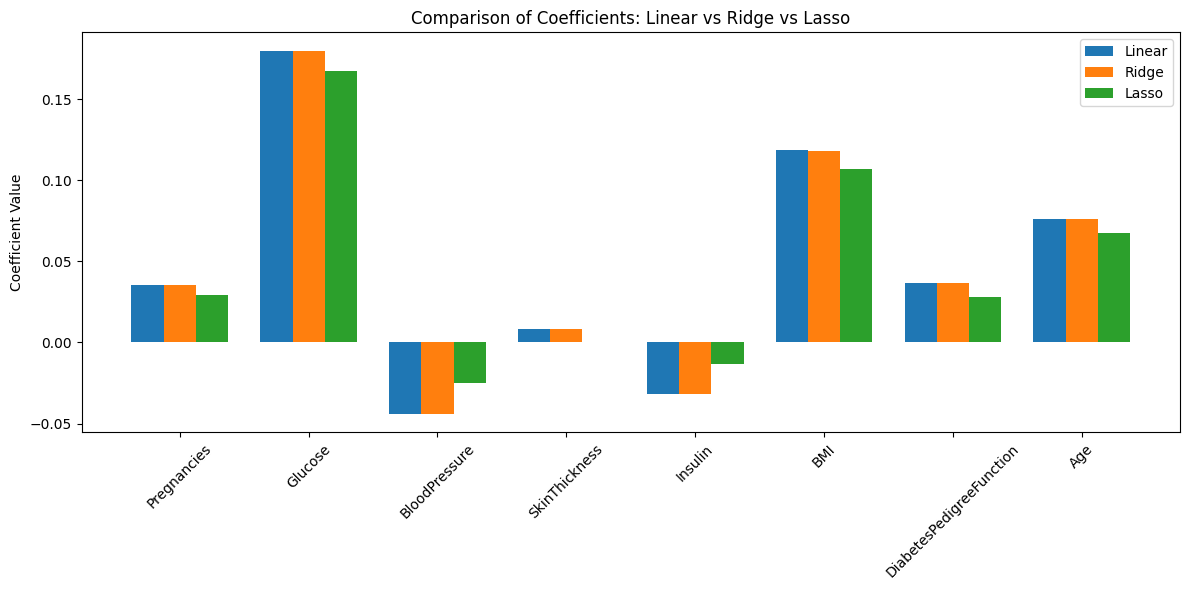

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names (from dataframe X)
feature_names = X.columns

# Collect coefficients
coef_lin = lin.coef_
coef_ridge = ridge.coef_
coef_lasso = lasso.coef_

# Set bar positions
x = np.arange(len(feature_names))
width = 0.25  # width of bars

plt.figure(figsize=(12,6))

# Plot bars
plt.bar(x - width, coef_lin, width, label="Linear")
plt.bar(x, coef_ridge, width, label="Ridge")
plt.bar(x + width, coef_lasso, width, label="Lasso")

# Add labels and legend
plt.xticks(x, feature_names, rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Comparison of Coefficients: Linear vs Ridge vs Lasso")
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
# Compare errors
print("\n----- MSE -----")
print("Linear Regression:", mean_squared_error(y_test, y_pred_lin))
print("Ridge Regression :", mean_squared_error(y_test, y_pred_ridge))
print("Lasso Regression :", mean_squared_error(y_test, y_pred_lasso))


----- MSE -----
Linear Regression: 0.17104527280850101
Ridge Regression : 0.1710033409616174
Lasso Regression : 0.17014051447320885
